In [ ]:
import pandas as pd

# Load dataset
file_path = '[Dataset]_(Viral_Konten_MedSos).xlsx'
data = pd.read_excel(file_path)

# Display
data.head()


,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731,12,219,0.663594,1.0,0.815385,4,2,1,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731,9,255,0.604743,1.0,0.791946,3,1,1,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731,9,211,0.575130,1.0,0.663866,3,1,1,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731,9,531,0.503788,1.0,0.665635,9,0,1,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731,13,1072,0.415646,1.0,0.540890,19,19,20,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [ ]:
# Check nilai yang kosong
missing_values = data.isnull().sum()
missing_values[missing_values > 0]


Series([], dtype: int64)

In [ ]:
# Display nama kolom untuk memastikan 'url' and 'shares' sudah benar
data.columns



Index(['url', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sent

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load dataset
file_path = '[Dataset]_(Viral_Konten_MedSos).xlsx'
data = pd.read_excel(file_path)

# Hapus spasi awal dan akhir dari nama kolom
data.columns = data.columns.str.strip()

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the data (excluding 'url' and 'shares')
scaled_data = scaler.fit_transform(data.drop(columns=['url', 'shares']))

# Convert the scaled data back to a DataFrame
scaled_data = pd.DataFrame(scaled_data, columns=data.columns.drop(['url', 'shares']))
scaled_data['shares'] = data['shares'].values

# Display beberapa baris pertama dari skala data
print(scaled_data.head())


   timedelta  n_tokens_title  n_tokens_content  n_unique_tokens  \
0    1.75788        0.757447         -0.695210         0.032772   
1    1.75788       -0.661657         -0.618794         0.016056   
2    1.75788       -0.661657         -0.712192         0.007645   
3    1.75788       -0.661657         -0.032933        -0.012619   
4    1.75788        1.230482          1.115439        -0.037655   

   n_non_stop_words  n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  \
0          0.000675                  0.038658  -0.607463       -0.335566   
1          0.000675                  0.031479  -0.695709       -0.594963   
2          0.000675                 -0.007752  -0.695709       -0.594963   
3          0.000675                 -0.007211  -0.166229       -0.854360   
4          0.000675                 -0.045420   0.716237        4.074185   

   num_imgs  num_videos  ...  min_positive_polarity  max_positive_polarity  \
0 -0.426526   -0.304268  ...               0.063865           

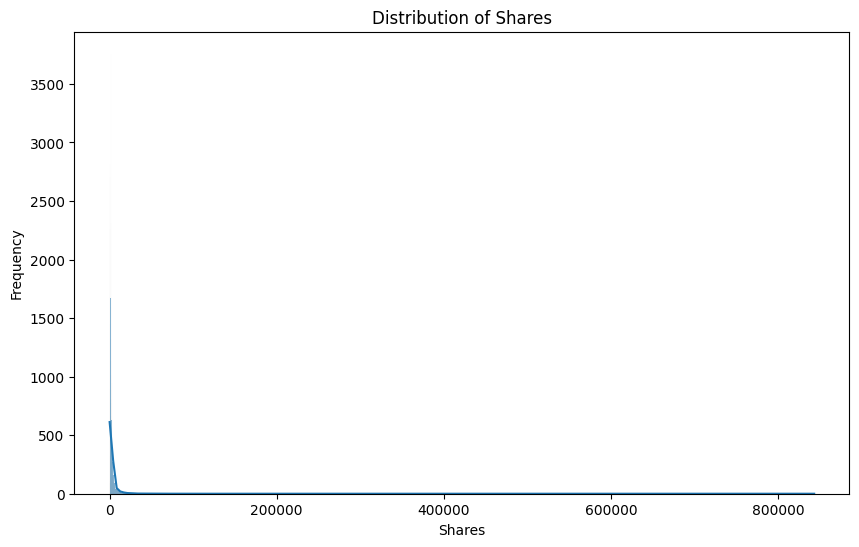

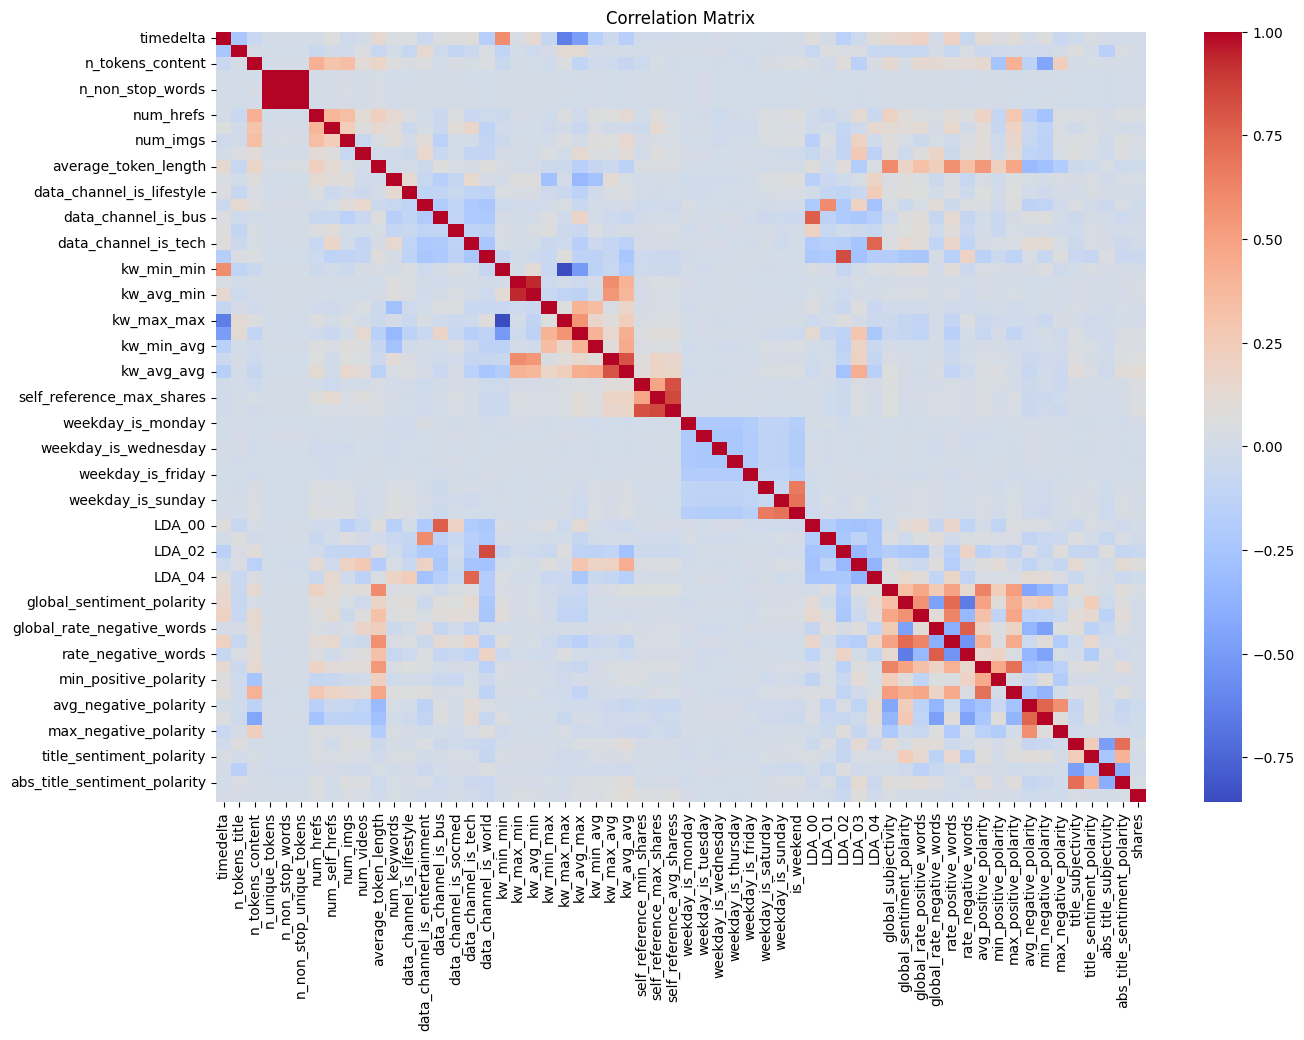

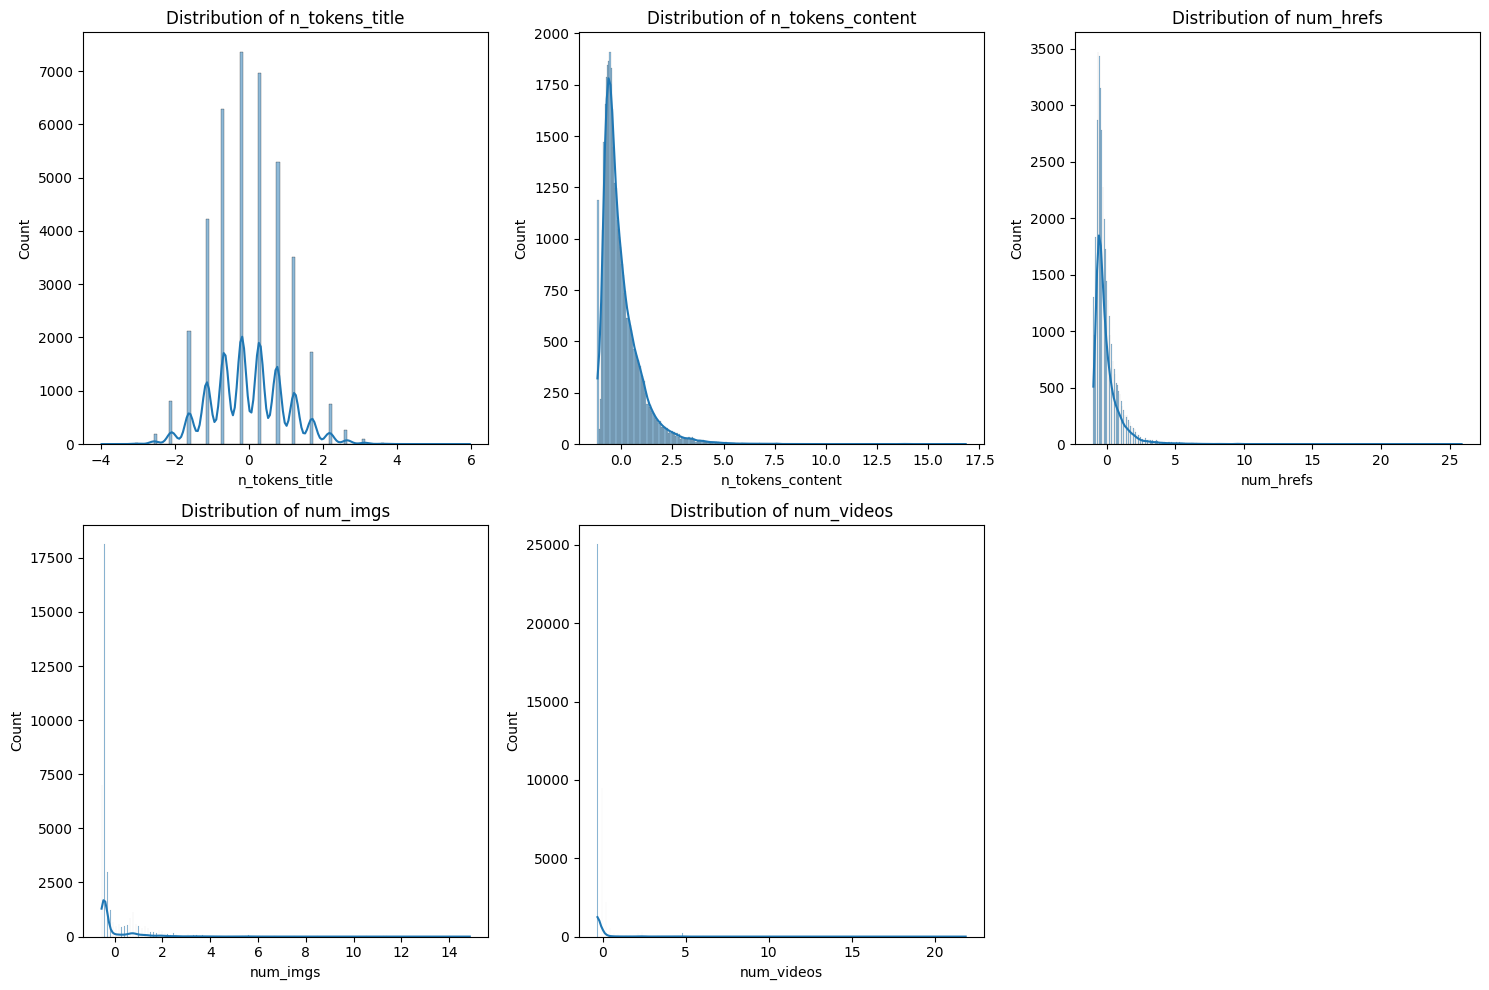

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of the target variable 'shares'
plt.figure(figsize=(10, 6))
sns.histplot(data['shares'], kde=True)
plt.title('Distribution of Shares')
plt.xlabel('Shares')
plt.ylabel('Frequency')
plt.show()

# Plot correlation matrix
plt.figure(figsize=(15, 10))
correlation_matrix = scaled_data.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Plot distributions untu beberapa fitur utama
key_features = ['n_tokens_title', 'n_tokens_content', 'num_hrefs', 'num_imgs', 'num_videos']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(key_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(scaled_data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()


Mean Squared Error: 127653811.15401052
R^2 Score: -0.05785920656273169


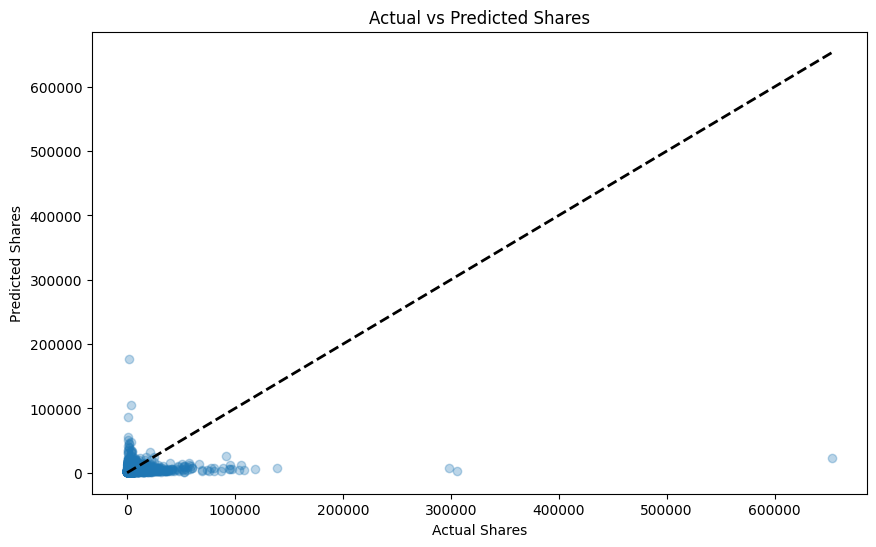

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

data.columns = data.columns.str.strip()

# Split data menjadi features and target
X = data.drop(columns=['url', 'shares'])
y = data['shares']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize dan train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# buat prediksi
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Shares')
plt.ylabel('Predicted Shares')
plt.title('Actual vs Predicted Shares')
plt.show()

Mean Squared Error (MSE): 127653811.15401052
R^2 Score: -0.05785920656273169
Mean Absolute Error (MAE): 3380.640761760625


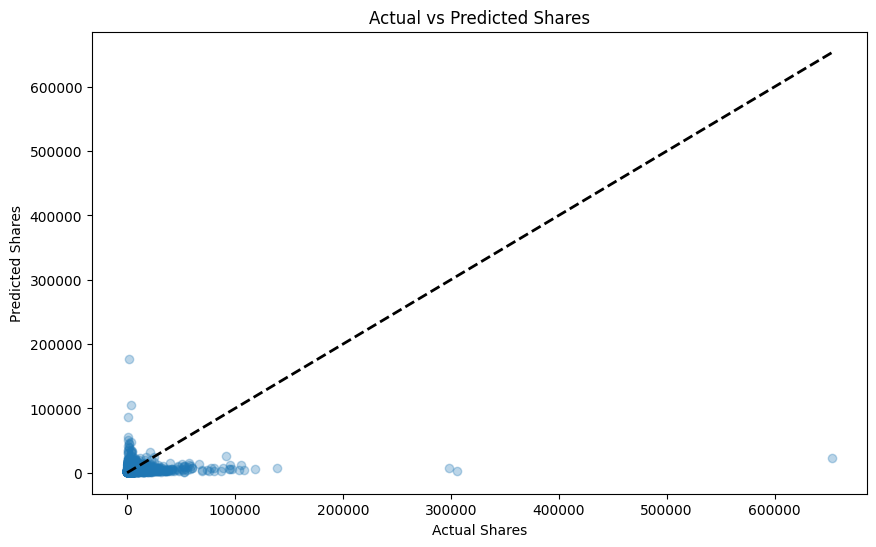

In [ ]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# import matplotlib.pyplot as plt

# # Strip leading and trailing spaces from column names
# data.columns = data.columns.str.strip()

# # Split data into features and target
# X = data.drop(columns=['url', 'shares'])
# y = data['shares']

# # Split data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Initialize and train the model
# model = RandomForestRegressor(n_estimators=100, random_state=42)
# model.fit(X_train, y_train)

# # Make predictions
# y_pred = model.predict(X_test)

# # Evaluate the model
# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)
# mae = mean_absolute_error(y_test, y_pred)

# print(f"Mean Squared Error (MSE): {mse}")
# print(f"R^2 Score: {r2}")
# print(f"Mean Absolute Error (MAE): {mae}")

# # Plotting the results
# plt.figure(figsize=(10, 6))
# plt.scatter(y_test, y_pred, alpha=0.3)
# plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
# plt.xlabel('Actual Shares')
# plt.ylabel('Predicted Shares')
# plt.title('Actual vs Predicted Shares')
# plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

# Data konten baru (contoh)
new_content = {
    'timedelta': [731],
    'n_tokens_title': [10],
    'n_tokens_content': [300],
    'n_unique_tokens': [0.6],
    'n_non_stop_words': [1],
    'n_non_stop_unique_tokens': [0.8],
    'num_hrefs': [5],
    'num_self_hrefs': [1],
    'num_imgs': [2],
    'num_videos': [1],
    'average_token_length': [4.5],
    'num_keywords': [5],
    'data_channel_is_lifestyle': [0],
    'data_channel_is_entertainment': [0],
    'data_channel_is_bus': [0],
    'data_channel_is_socmed': [1],
    'data_channel_is_tech': [0],
    'data_channel_is_world': [0],
    'kw_min_min': [0],
    'kw_max_min': [3],
    'kw_avg_min': [1],
    'kw_min_max': [0],
    'kw_max_max': [10],
    'kw_avg_max': [5],
    'kw_min_avg': [0],
    'kw_max_avg': [7],
    'kw_avg_avg': [4],
    'self_reference_min_shares': [100],
    'self_reference_max_shares': [200],
    'self_reference_avg_sharess': [150],
    'weekday_is_monday': [1],
    'weekday_is_tuesday': [0],
    'weekday_is_wednesday': [0],
    'weekday_is_thursday': [0],
    'weekday_is_friday': [0],
    'weekday_is_saturday': [0],
    'weekday_is_sunday': [0],
    'is_weekend': [0],
    'LDA_00': [0.1],
    'LDA_01': [0.2],
    'LDA_02': [0.3],
    'LDA_03': [0.2],
    'LDA_04': [0.2],
    'global_subjectivity': [0.5],
    'global_sentiment_polarity': [0.1],
    'global_rate_positive_words': [0.05],
    'global_rate_negative_words': [0.01],
    'rate_positive_words': [0.1],
    'rate_negative_words': [0.02],
    'avg_positive_polarity': [0.2],
    'min_positive_polarity': [0.1],
    'max_positive_polarity': [0.3],
    'avg_negative_polarity': [-0.1],
    'min_negative_polarity': [-0.2],
    'max_negative_polarity': [-0.05],
    'title_subjectivity': [0.5],
    'title_sentiment_polarity': [0.1],
    'abs_title_subjectivity': [0.5],
    'abs_title_sentiment_polarity': [0.1]
}

# Convert new content to DataFrame
new_content_df = pd.DataFrame(new_content)

# Normalisasi data baru menggunakan scaler yang telah dilatih
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Fit scaler on training data
new_content_scaled = scaler.transform(new_content_df)  # Transform new content

# Prediksi jumlah shares
predicted_shares = model.predict(new_content_scaled)

# Tentukan ambang batas viralitas (contoh: lebih dari 1400 shares dianggap viral)
viral_threshold = 1400

# Tentukan apakah konten viral
is_viral = predicted_shares[0] > viral_threshold
print(f"Predicted Shares: {predicted_shares[0]}")
print(f"Is Viral: {'Yes' if is_viral else 'No'}")


Predicted Shares: 7909.31
Is Viral: Yes


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [1]:
!pip install ipywidgets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.0 MB/s eta 0:00:00


Button(description='Upload Dataset', style=ButtonStyle())

Output()

Saving sample_viral_content.xlsx to sample_viral_content (1).xlsx


,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731,12,219,0.663594,1.0,0.815385,4,2,1,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731,9,255,0.604743,1.0,0.791946,3,1,1,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731,9,211,0.575130,1.0,0.663866,3,1,1,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731,9,531,0.503788,1.0,0.665635,9,0,1,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731,13,1072,0.415646,1.0,0.540890,19,19,20,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


Series([], dtype: int64)

Index(['url', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sent

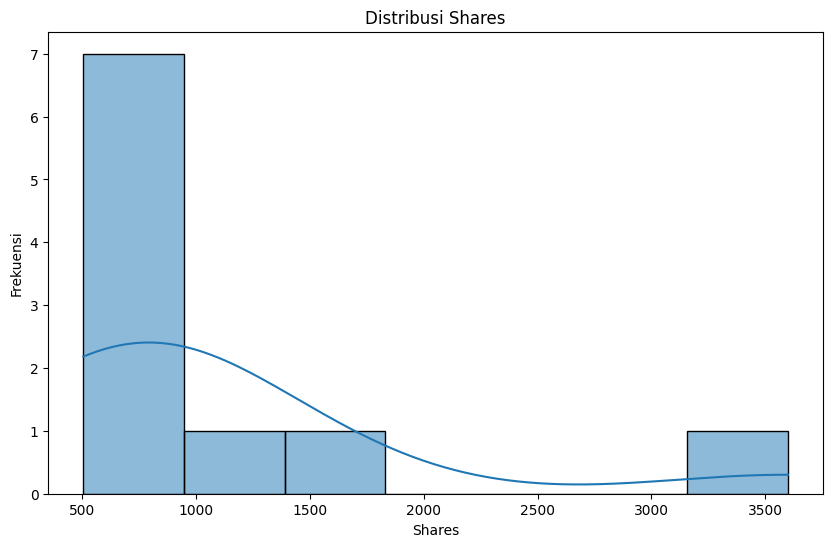

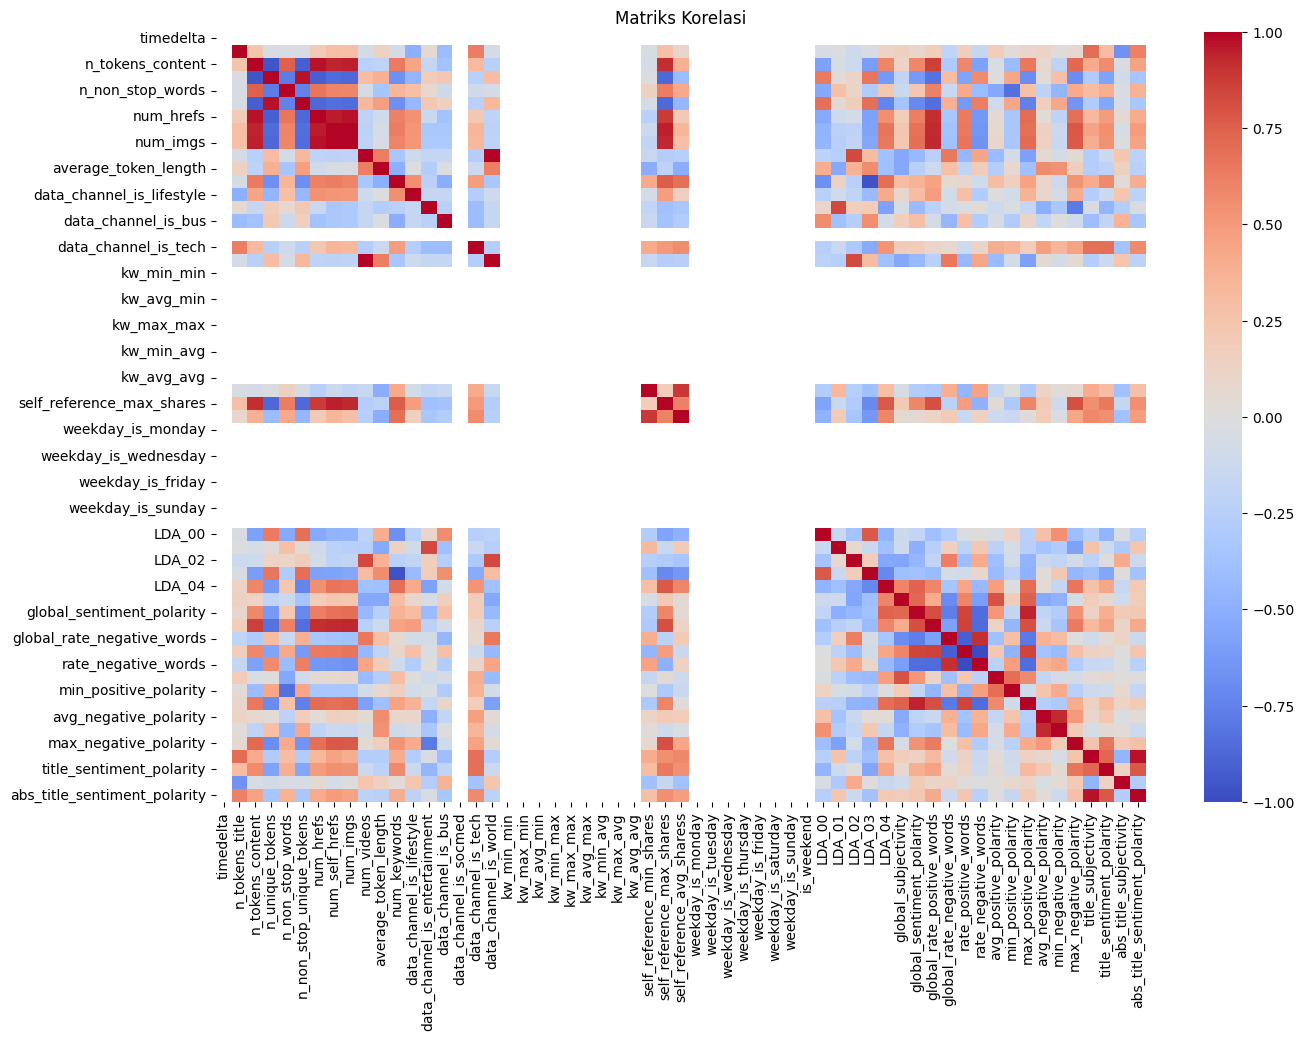

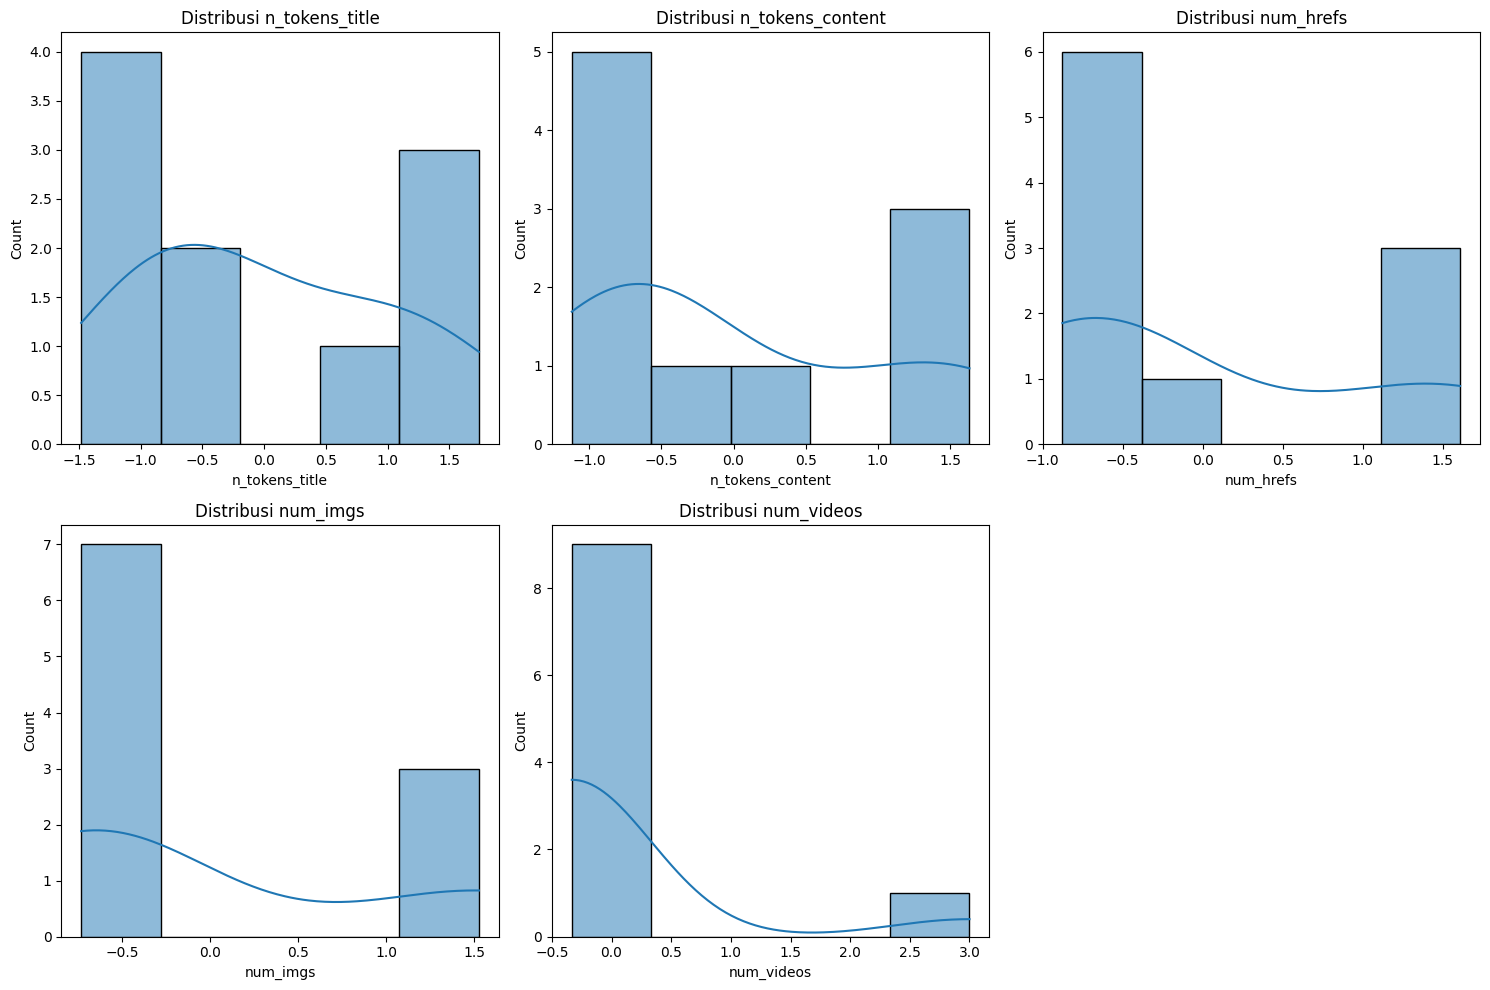

Evaluation metrics:
Mean Squared Error (MSE): 3759846.14205
R^2 Score: -0.8019178232181581
Mean Absolute Error (MAE): 1410.495


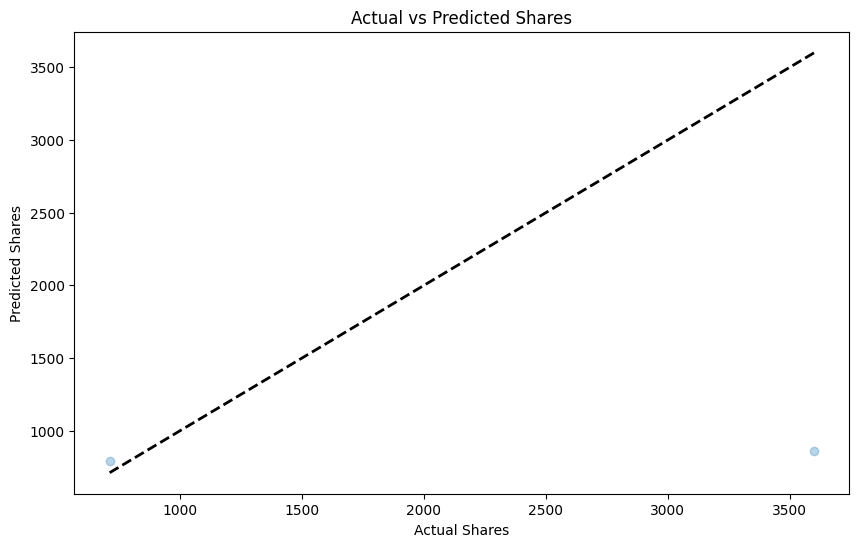

Predicted Shares: 831.36
Is Viral: No


In [7]:
#semuanya (dnegan ui)
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display
from google.colab import files

# Function untuk load dan menampilkan dataset
def load_dataset(file_path):
    data = pd.read_excel(file_path)
    display(data.head())
    return data

# Function untuk cek missing values
def check_missing_values(data):
    missing_values = data.isnull().sum()
    display(missing_values[missing_values > 0])

# Function untuk menampilkan column names
def display_columns(data):
    display(data.columns)

# Function untuk memproses data
def preprocess_data(data):
    data.columns = data.columns.str.strip()
    X = data.drop(columns=['url', 'shares'])
    y = data['shares']
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    return X_scaled, y, scaler

# Function untuk visualisasi data
def visualize_data(data, scaled_data):
    plt.figure(figsize=(10, 6))
    sns.histplot(data['shares'], kde=True)
    plt.title('Distribusi Shares')
    plt.xlabel('Shares')
    plt.ylabel('Frekuensi')
    plt.show()

    plt.figure(figsize=(15, 10))
    correlation_matrix = pd.DataFrame(scaled_data, columns=data.columns.drop(['url', 'shares'])).corr()
    sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
    plt.title('Matriks Korelasi')
    plt.show()

    key_features = ['n_tokens_title', 'n_tokens_content', 'num_hrefs', 'num_imgs', 'num_videos']
    plt.figure(figsize=(15, 10))
    for i, feature in enumerate(key_features, 1):
        plt.subplot(2, 3, i)
        sns.histplot(pd.DataFrame(scaled_data, columns=data.columns.drop(['url', 'shares']))[feature], kde=True)
        plt.title(f'Distribusi {feature}')
    plt.tight_layout()
    plt.show()

# Function untuk train dan evaluate model
def train_evaluate_model(X_scaled, y):
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    print("Evaluation metrics:")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"R^2 Score: {r2}")
    print(f"Mean Absolute Error (MAE): {mae}")

    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.3)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    plt.xlabel('Actual Shares')
    plt.ylabel('Predicted Shares')
    plt.title('Actual vs Predicted Shares')
    plt.show()

    return model

# Function untuk prediksi new content
def predict_new_content(model, scaler):
    new_content = {
        'timedelta': [731],
        'n_tokens_title': [10],
        'n_tokens_content': [300],
        'n_unique_tokens': [0.6],
        'n_non_stop_words': [1],
        'n_non_stop_unique_tokens': [0.8],
        'num_hrefs': [5],
        'num_self_hrefs': [1],
        'num_imgs': [2],
        'num_videos': [1],
        'average_token_length': [4.5],
        'num_keywords': [5],
        'data_channel_is_lifestyle': [0],
        'data_channel_is_entertainment': [0],
        'data_channel_is_bus': [0],
        'data_channel_is_socmed': [1],
        'data_channel_is_tech': [0],
        'data_channel_is_world': [0],
        'kw_min_min': [0],
        'kw_max_min': [3],
        'kw_avg_min': [1],
        'kw_min_max': [0],
        'kw_max_max': [10],
        'kw_avg_max': [5],
        'kw_min_avg': [0],
        'kw_max_avg': [7],
        'kw_avg_avg': [4],
        'self_reference_min_shares': [100],
        'self_reference_max_shares': [200],
        'self_reference_avg_sharess': [150],
        'weekday_is_monday': [1],
        'weekday_is_tuesday': [0],
        'weekday_is_wednesday': [0],
        'weekday_is_thursday': [0],
        'weekday_is_friday': [0],
        'weekday_is_saturday': [0],
        'weekday_is_sunday': [0],
        'is_weekend': [0],
        'LDA_00': [0.1],
        'LDA_01': [0.2],
        'LDA_02': [0.3],
        'LDA_03': [0.2],
        'LDA_04': [0.2],
        'global_subjectivity': [0.5],
        'global_sentiment_polarity': [0.1],
        'global_rate_positive_words': [0.05],
        'global_rate_negative_words': [0.01],
        'rate_positive_words': [0.1],
        'rate_negative_words': [0.02],
        'avg_positive_polarity': [0.2],
        'min_positive_polarity': [0.1],
        'max_positive_polarity': [0.3],
        'avg_negative_polarity': [-0.1],
        'min_negative_polarity': [-0.2],
        'max_negative_polarity': [-0.05],
        'title_subjectivity': [0.5],
        'title_sentiment_polarity': [0.1],
        'abs_title_subjectivity': [0.5],
        'abs_title_sentiment_polarity': [0.1]
    }
    new_content_df = pd.DataFrame(new_content)
    new_content_scaled = scaler.transform(new_content_df)
    predicted_shares = model.predict(new_content_scaled)
    viral_threshold = 1400
    is_viral = predicted_shares[0] > viral_threshold
    print(f"Predicted Shares: {predicted_shares[0]}")
    print(f"Is Viral: {'Yes' if is_viral else 'No'}")

# Widgets for file upload and button to start analysis
upload_button = widgets.Button(description="Upload Dataset")
output = widgets.Output()

# Function to handle file upload and start the analysis
def on_upload_button_clicked(b):
    uploaded = files.upload()
    for file_name in uploaded.keys():
        with open(file_name, 'wb') as f:
            f.write(uploaded[file_name])

        # Load dataset
        data = load_dataset(file_name)

        # Check for missing values
        check_missing_values(data)

        # Display columns
        display_columns(data)

        # Preprocess data
        X_scaled, y, scaler = preprocess_data(data)

        # Visualize data
        visualize_data(data, X_scaled)

        # Train and evaluate model
        model = train_evaluate_model(X_scaled, y)

        # Predict new content
        predict_new_content(model, scaler)

# Set up button click event
upload_button.on_click(on_upload_button_clicked)

# Display the widgets
display(upload_button, output)
